<a href="https://colab.research.google.com/github/ricardorocha86/MATF52/blob/main/KNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Vizinhos Mais Próximos**

# Desvendando o KNN: K-Vizinhos Mais Próximos

Olá, futuros estatísticos! Hoje vamos explorar um dos algoritmos mais intuitivos e fundamentais do aprendizado de máquina: o **K-Nearest Neighbors (KNN)**, ou K-Vizinhos Mais Próximos. Pense nele como uma versão computacional daquele velho ditado: "Diga-me com quem andas e te direi quem és".

### 1. Qual é a Grande Ideia do KNN?

Imagine que um novo ponto de dados chega (vamos chamá-lo de "novato") e você quer saber a qual grupo ele pertence (classificação) ou qual valor numérico associar a ele (regressão). O que o KNN faz?

Simples: ele olha ao redor! O KNN encontra os **'K' pontos de dados mais próximos** do "novato" que já conhecemos (nossos dados de treinamento). A partir daí, a decisão é tomada com base nessa vizinhança:

*   **Para Classificação:** O "novato" recebe a etiqueta (classe) mais comum entre seus K vizinhos. É uma espécie de "votação" local.
*   **Para Regressão:** O "novato" recebe um valor que é a média (ou outra medida central) dos valores de seus K vizinhos.

**Características:**

*   **Não Paramétrico:** O KNN não faz suposições rígidas sobre como os dados estão distribuídos (como a linearidade na regressão linear). Ele se adapta à forma dos dados.
*   **Algoritmo "Preguiçoso": (Lazy Learner)** Não existe uma fase de "treinamento" pesada onde o modelo aprende uma função complexa. O KNN memoriza os dados de treino e faz todo o trabalho pesado na hora de prever um novo ponto.

### 2. Como o KNN funciona? O algoritmo passo a passo

Vamos detalhar o processo quando recebemos um novo ponto $x₀$ que queremos classificar ou prever:

1.  **Escolha o 'K':** Primeiro, você define quantos vizinhos ($K$) serão consultados (vamos falar mais sobre isso!).
2.  **Calcule as Distâncias:** Meça a "distância" entre o seu $x₀$ e **todos** os outros pontos $xᵢ$ no seu conjunto de treinamento. A métrica de distância mais comum é a **Euclidiana** (a boa e velha distância em linha reta), mas existem outras.
3.  **Encontre os Vizinhos:** Ordene todos os pontos de treinamento pela distância calculada (do mais próximo ao mais distante) e pegue os $K$ pontos do topo da lista. Esses são os K-vizinhos mais próximos de $x₀$.
4.  **Tome a Decisão:**
    *   **Classificação:** Conte qual classe aparece mais vezes entre os K vizinhos. Essa será a classe prevista para $x₀$.
    *   **Regressão:** Calcule a média dos valores $yᵢ$ dos K vizinhos. Esse será o valor previsto para $x₀$.

Pronto! Simples, não? Mas essa simplicidade esconde algumas escolhas importantes.

### 3. Os hiperparâmetros do modelo: 'K' e a Métrica de Distância

O sucesso do KNN depende muito de duas escolhas cruciais:

**a) O Valor de 'K': O Tamanho da Vizinhança**

*   **'K' Pequeno (Ex: K=1):** O modelo fica muito "nervoso", se ajustando a cada detalhe local, incluindo ruídos.
    *   *Pró:* Baixo **Viés** (captura bem a estrutura local).
    *   *Contra:* Alta **Variância** (muito sensível a pequenas mudanças nos dados, fronteiras de decisão irregulares).
*   **'K' Grande (Ex: K=N):** O modelo fica muito "calmo", suavizando demais as tendências locais.
    *   *Pró:* Baixa **Variância** (predições mais estáveis).
    *   *Contra:* Alto **Viés** (pode ignorar padrões locais importantes, tendendo à média ou classe global).

**Conexão Estatística:** Percebeu? A escolha de $K$ é um controle direto sobre o famoso **trade-off Viés-Variância**! Encontrar o $K$ ideal geralmente envolve testar vários valores usando **Validação Cruzada** e escolher aquele que minimiza o erro em dados não vistos. $K$ é um **hiperparâmetro** do modelo.

**b) A Métrica de Distância: Como Medir a Proximidade?**

Como definimos "próximo"? A escolha da métrica de distância é fundamental.

*   **Distância Euclidiana (L2):** A mais popular. Ótima para espaços onde as dimensões são comparáveis. $√(∑(xᵢₚ - xⱼₚ)²)$.
*   **Distância de Manhattan (L1):** A soma das diferenças absolutas. Pode ser mais robusta a outliers em certas dimensões. $∑|xᵢₚ - xⱼₚ|$.
*   Outras: Existem muitas (Minkowski, Hamming para categóricos, etc.), dependendo da natureza dos seus dados.

**Alerta Importante:** A métrica de distância é muito sensível à escala das suas variáveis!

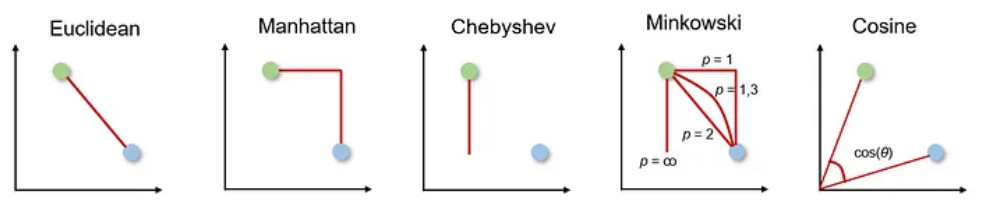

EQM Modelo Geral: 54.55
EQM Modelos Separados: 43.47


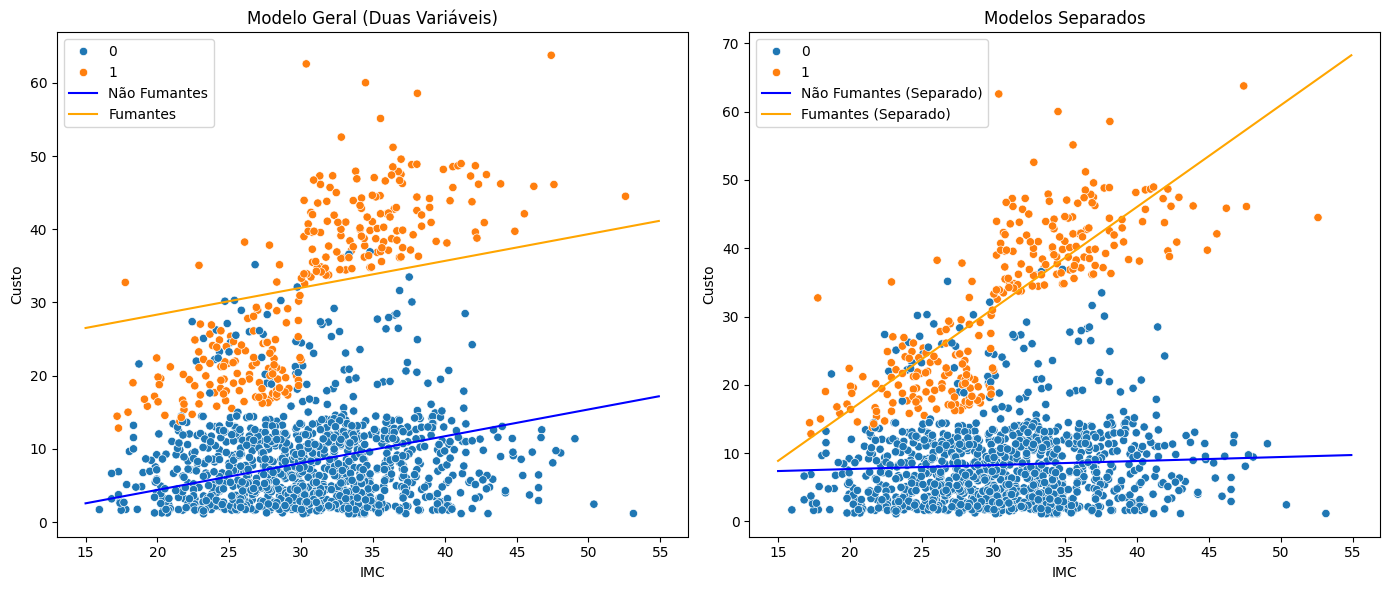

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supondo que 'dados' seja um DataFrame com as colunas 'bmi', 'smoker' (0 ou 1) e 'charges'

# Modelo geral com duas variáveis preditoras
X = dados[['bmi', 'smoker']]
y = dados['charges']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25)
modelo_geral = LinearRegression()
modelo_geral.fit(X_treino, y_treino)
preditos_geral = modelo_geral.predict(X_teste)
EQM_geral = mean_squared_error(y_teste, preditos_geral)
print('EQM Modelo Geral: {:.2f}'.format(EQM_geral))

# Coeficientes do modelo geral
b0 = modelo_geral.intercept_
b1, b2 = modelo_geral.coef_

# Modelo separado: ajuste simples apenas com 'bmi'
treino = X_treino.copy()
treino['charges'] = y_treino

# Modelo para não fumantes (smoker == 0)
treino_ns = treino[treino['smoker'] == 0]
modelo_ns = LinearRegression()
modelo_ns.fit(treino_ns[['bmi']], treino_ns['charges'])

# Modelo para fumantes (smoker == 1)
treino_sm = treino[treino['smoker'] == 1]
modelo_sm = LinearRegression()
modelo_sm.fit(treino_sm[['bmi']], treino_sm['charges'])

# Avaliando os modelos separados no mesmo conjunto de teste
teste = X_teste.copy()
teste['charges'] = y_teste

# Separando os índices para não fumantes e fumantes
idx_ns = teste['smoker'] == 0
idx_sm = teste['smoker'] == 1

# Previsões para cada grupo de forma vetorizada
pred_separado = pd.Series(index=teste.index, dtype=float)
pred_separado.loc[idx_ns] = modelo_ns.predict(teste.loc[idx_ns, ['bmi']])
pred_separado.loc[idx_sm] = modelo_sm.predict(teste.loc[idx_sm, ['bmi']])
teste['pred_separado'] = pred_separado

EQM_separado = mean_squared_error(teste['charges'], teste['pred_separado'])
print('EQM Modelos Separados: {:.2f}'.format(EQM_separado))

# Definindo intervalo para IMC (bmi) para plotar as linhas ajustadas
x = np.arange(15, 55, 0.1)
# Previsões do modelo geral para cada grupo:
y0_geral = b0 + b1 * x + b2 * 0  # não fumantes
y1_geral = b0 + b1 * x + b2 * 1  # fumantes

# Previsões dos modelos separados:
y0_sep = modelo_ns.intercept_ + modelo_ns.coef_[0] * x  # não fumantes
y1_sep = modelo_sm.intercept_ + modelo_sm.coef_[0] * x  # fumantes

# Gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Esquerda: Modelo geral com duas variáveis
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=dados, ax=axs[0])
axs[0].plot(x, y0_geral, color='blue', label='Não Fumantes')
axs[0].plot(x, y1_geral, color='orange', label='Fumantes')
axs[0].set_title('Modelo Geral (Duas Variáveis)')
axs[0].set_xlabel('IMC')
axs[0].set_ylabel('Custo')
axs[0].legend()

# Direita: Modelos separados
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=dados, ax=axs[1])
axs[1].plot(x, y0_sep, color='blue', label='Não Fumantes (Separado)')
axs[1].plot(x, y1_sep, color='orange', label='Fumantes (Separado)')
axs[1].set_title('Modelos Separados')
axs[1].set_xlabel('IMC')
axs[1].set_ylabel('Custo')
axs[1].legend()

plt.tight_layout()
plt.show()


## **Importação e Preparação dos Dados**

In [1]:
# via github

import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---

## **Upgrade na Técnica de Validação: _Holdout Repetido_**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

Reps = 1000
eqms = []

X = dados[['bmi', 'smoker']]
y = dados['charges']

for i in range(Reps):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    reg = LinearRegression()
    reg.fit(Xtreino, ytreino)
    preditos = reg.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
    eqms.append(eqm)

print(np.mean(eqms))

50.391872525904354


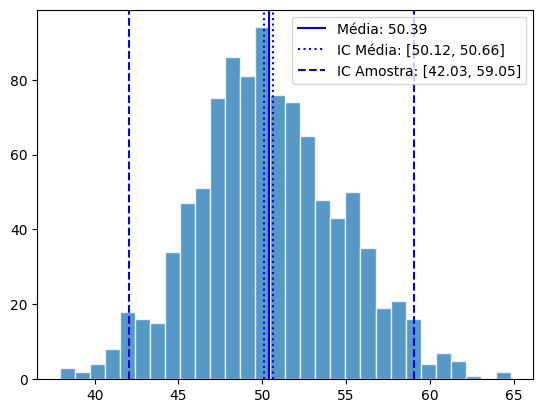

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

media = np.mean(eqms)
desvio = np.std(eqms, ddof=1)
n = len(eqms)
erro = desvio / np.sqrt(n)

# IC para a média com distribuição normal (95%)
IC_media = st.norm.interval(0.95, loc=media, scale=erro)
# IC empírico para a amostra (percentis 2.5 e 97.5)
IC_amostra = np.percentile(eqms, [2.5, 97.5])

plt.hist(eqms, bins=30, edgecolor='white', alpha = 0.75)
plt.axvline(media, color='blue', linestyle='solid', label=f'Média: {media:.2f}')
plt.axvline(IC_media[0], color='blue', linestyle='dotted', label=f'IC Média: [{IC_media[0]:.2f}, {IC_media[1]:.2f}]')
plt.axvline(IC_media[1], color='blue', linestyle='dotted')
plt.axvline(IC_amostra[0], color='blue', linestyle='dashed', label=f'IC Amostra: [{IC_amostra[0]:.2f}, {IC_amostra[1]:.2f}]')
plt.axvline(IC_amostra[1], color='blue', linestyle='dashed')
plt.legend()
plt.show()


---

## **Modelo: K-Vizinhos Mais Próximos (K-NN)**

In [38]:
from sklearn.neighbors import KNeighborsRegressor

k = 1003
Reps = 100

eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges']

for i in range(Reps):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(Xtreino, ytreino)

    preditos_treino = knn.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = knn.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)

print('O EQM de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O EQM de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O EQM de TREINO foi: 146.39
O EQM de TESTE  foi:  147.15


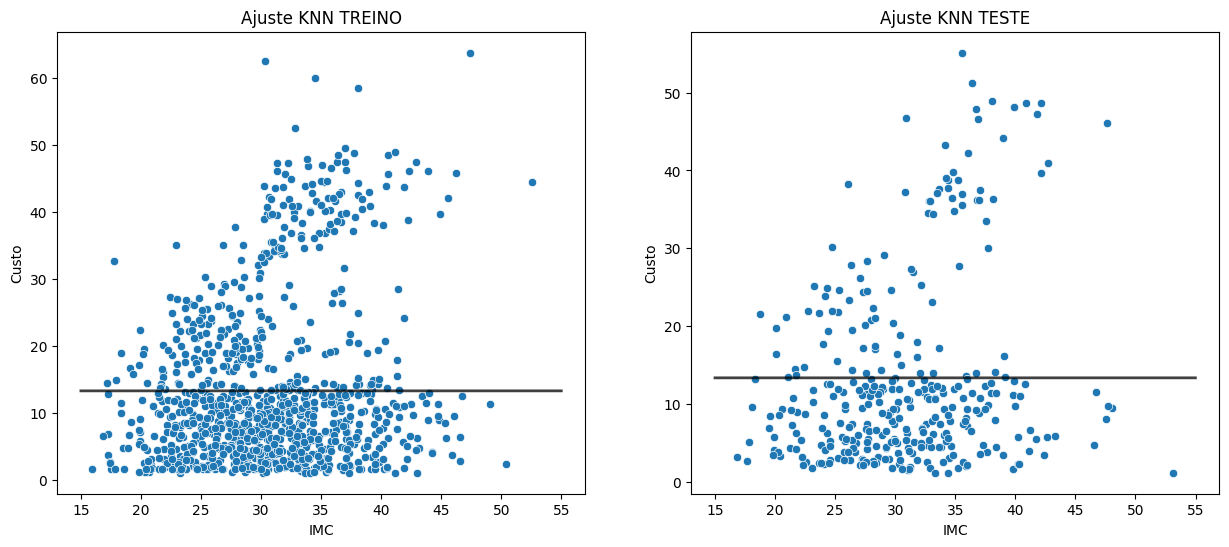

In [39]:
# Gráfico do KNN com 1 Variável

import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(Xtreino, ytreino)

x0 = np.arange(15, 55, 0.01)
y0 = knn.predict(pd.DataFrame({'bmi': x0}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x0, y0, color = 'black', linewidth = 2, alpha = 0.75)
plt.title('Ajuste KNN TREINO')
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x0, y0, color = 'black', linewidth = 2, alpha = 0.75)
plt.title('Ajuste KNN TESTE')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

In [42]:
k = 3
Reps = 100

eqms_treino = []
eqms_teste = []

X = dados[['bmi', 'smoker']]
y = dados['charges']

for i in range(Reps):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(Xtreino, ytreino)

    preditos_treino = knn.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = knn.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)

print('O EQM de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O EQM de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O EQM de TREINO foi: 27.20
O EQM de TESTE  foi:  51.31


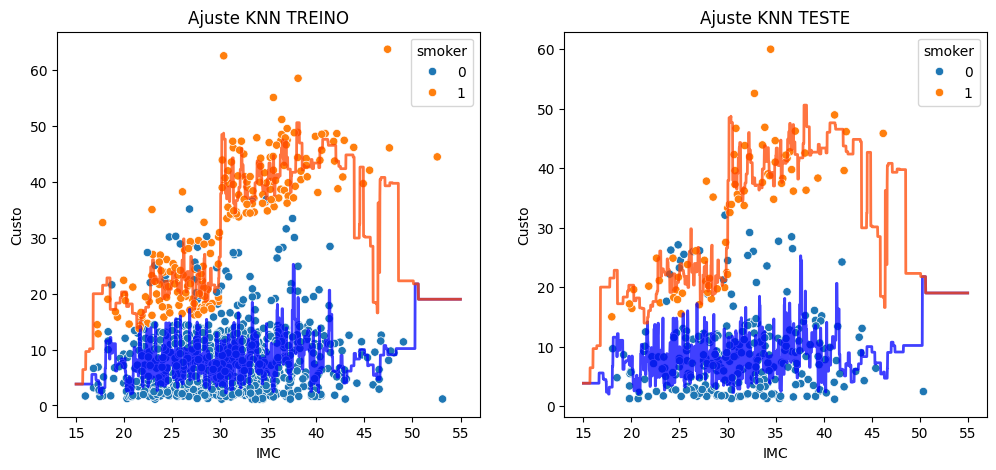

In [43]:
# Gráfico do Modelo com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino)

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

d0 = modelo.predict(pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T)
d1 = modelo.predict(pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'])
plt.plot(x, d0, '-', color = 'blue', linewidth = 2, alpha = 0.75)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2, alpha = 0.75)
plt.title('Ajuste KNN TREINO')
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'])
plt.plot(x, d0, '-', color = 'blue', linewidth = 2, alpha = 0.75)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2, alpha = 0.75)
plt.title('Ajuste KNN TESTE')
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()

---

## **Exercício Proposto**

- Analise os valores de K do KNN. Calcule o EQM no treino e teste, com estimativas pontuais e intervalares (baseadas nas repeticoes do holdout), e faça um gráfico. Tire as conclusoes

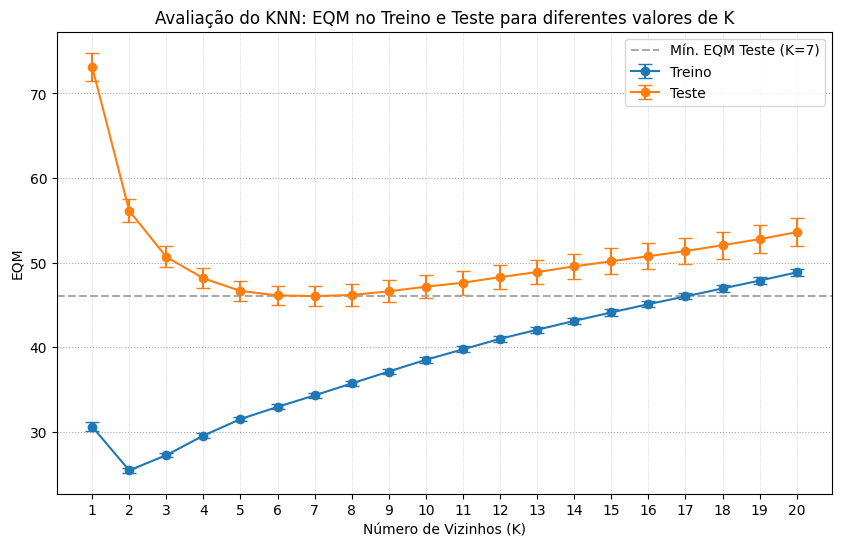

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import t

# Suponha que 'dados' seja um DataFrame com as colunas 'bmi', 'smoker' (0 ou 1) e 'charges'
X = dados[['bmi', 'smoker']]
y = dados['charges']

# Valores de K a serem testados
K_values = range(1, 21)

# Número de repetições do holdout
n_reps = 100

# Dicionários para armazenar os EQMs em cada repetição
train_results = {k: [] for k in K_values}
test_results  = {k: [] for k in K_values}

# Repetição do holdout para cada valor de K
for rep in range(n_reps):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rep)

    for k in K_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_train_pred = knn.predict(X_train)
        y_test_pred  = knn.predict(X_test)

        train_results[k].append(mean_squared_error(y_train, y_train_pred))
        test_results[k].append(mean_squared_error(y_test, y_test_pred))

# Cálculo das estimativas pontuais e intervalares (IC 95%) para cada K
train_means, test_means = [], []
train_cis_lower, train_cis_upper = [], []
test_cis_lower, test_cis_upper = [], []

alpha = 0.05
df_reps = n_reps - 1
t_mult = t.ppf(1 - alpha/2, df_reps)

for k in K_values:
    train_mses = np.array(train_results[k])
    test_mses  = np.array(test_results[k])

    # Média e desvio padrão
    train_mean = train_mses.mean()
    test_mean  = test_mses.mean()
    train_std  = train_mses.std(ddof=1)
    test_std   = test_mses.std(ddof=1)

    # Erro padrão
    train_se = train_std / np.sqrt(n_reps)
    test_se  = test_std  / np.sqrt(n_reps)

    # Armazenando as médias e intervalos
    train_means.append(train_mean)
    test_means.append(test_mean)
    train_cis_lower.append(train_mean - t_mult * train_se)
    train_cis_upper.append(train_mean + t_mult * train_se)
    test_cis_lower.append(test_mean - t_mult * test_se)
    test_cis_upper.append(test_mean + t_mult * test_se)

# Calculando os erros para plotagem das barras de erro
train_err_lower = np.array(train_means) - np.array(train_cis_lower)
train_err_upper = np.array(train_cis_upper) - np.array(train_means)
test_err_lower  = np.array(test_means) - np.array(test_cis_lower)
test_err_upper  = np.array(test_cis_upper) - np.array(test_means)

# Identificando o valor mínimo do EQM de teste e seu K correspondente
min_eqm_test = min(test_means)
min_eqm_k = K_values[np.argmin(test_means)]

# Gráfico com as estimativas pontuais e intervalares
plt.figure(figsize=(10, 6))
plt.errorbar(K_values, train_means, yerr=[train_err_lower, train_err_upper],
             fmt='-o', capsize=5, label='Treino')
plt.errorbar(K_values, test_means, yerr=[test_err_lower, test_err_upper],
             fmt='-o', capsize=5, label='Teste')

# Ticks no eixo x nos valores de K
plt.xticks(K_values)

# Grid cinza pontilhado com linhas verticais nos valores de K
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.7)
for k in K_values:
    plt.axvline(x=k, color='gray', linestyle=':', linewidth=0.5, alpha=0.5)

# Linha horizontal tracejada cinza escura no valor mínimo do EQM de teste
plt.axhline(y=min_eqm_test, color='darkgray', linestyle='--', linewidth=1.5,
            label=f'Mín. EQM Teste (K={min_eqm_k})')

plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('EQM')
plt.title('Avaliação do KNN: EQM no Treino e Teste para diferentes valores de K')
plt.legend()
plt.show()




### 4. Cuidado Essencial: A Importância da Escala!

Imagine calcular a distância entre pessoas usando "altura em metros" e "salário anual em Reais". O salário, por ter uma magnitude muito maior, vai dominar completamente o cálculo da distância! A altura se tornará quase irrelevante.

**Solução:** Antes de usar o KNN, é **quase sempre necessário pré-processar seus dados escalonando as variáveis preditoras**. Isso garante que todas contribuam de forma justa para a distância. Métodos comuns:

*   **Padronização (Standardization):** Transforma os dados para ter média 0 e desvio padrão 1. Ótimo se você assume (ou não se importa com) uma distribuição próxima da normal.
*   **Normalização (Min-Max Scaling):** Coloca todos os valores em um intervalo fixo, como [0, 1]. Útil quando você quer limitar o intervalo.

**Não pule esta etapa!** É crucial para um bom desempenho do KNN.

### 5. KNN e a Estatística: Laços Familiares

Como estatísticos, vocês podem reconhecer alguns conceitos familiares no KNN:

*   **Estatística Não Paramétrica:** O KNN é um exemplo clássico. Ele não assume uma forma funcional pré-definida para a relação entre X e Y.
*   **Estimadores Locais:** A predição para um ponto $x₀$ usa apenas informações da sua vizinhança imediata. É uma forma de **média local** (regressão) ou **votação local** (classificação).
*   **Viés-Variância:** Como vimos, o $K$ controla diretamente esse equilíbrio fundamental.
*   **Maldição da Dimensionalidade:** Ah, o grande desafio! Em espaços com muitas dimensões (muitas variáveis preditoras), tudo fica "longe" de tudo. O conceito de "vizinhança" perde força, e variáveis irrelevantes podem atrapalhar o cálculo da distância. O desempenho do KNN pode cair drasticamente. Fiquem atentos a isso! Seleção de variáveis ou técnicas de redução de dimensionalidade (como PCA) podem ser necessárias.

### 6. Na Balança: Prós e Contras do KNN

**Pontos Fortes:**

*   ✅ **Simples e Intuitivo:** Fácil de explicar e entender.
*   ✅ **Flexível:** Por ser não paramétrico, adapta-se a fronteiras complexas.
*   ✅ **Sem Treinamento Pesado:** A fase de "aprendizado" é apenas armazenar os dados.
*   ✅ **Versátil:** Funciona para classificação e regressão.

**Pontos Fracos:**

*   ❌ **Lento na Predição:** Precisa calcular distâncias para *todos* os pontos de treino a cada nova predição (problemático para datasets gigantes).
*   ❌ **Sensível a Variáveis Irrelevantes:** A Maldição da Dimensionalidade ataca aqui.
*   ❌ **Exige Escalonamento:** Sensível à escala das variáveis.
*   ❌ **Escolha de 'K' e Distância:** O desempenho depende dessas escolhas (requer validação).
*   ❌ **Problemas com Dados Desbalanceados:** Classes majoritárias podem dominar as vizinhanças.

### 7. Para Levar pra Casa

O KNN é uma ferramenta poderosa e elegante, especialmente pela sua simplicidade e falta de suposições fortes. É um excelente ponto de partida para muitos problemas de previsão e um ótimo *baseline* para comparar com métodos mais sofisticados. Entender como $K$, a métrica de distância e o escalonamento afetam seu desempenho, além de estar ciente da maldição da dimensionalidade, permitirá que vocês usem o KNN de forma eficaz e crítica.

**Próximos Passos (Para explorar):**

*   KNN Ponderado (dar mais peso aos vizinhos mais próximos).
*   Comparações com outros métodos que vocês verão (Regressão Logística, Árvores, SVM...).
*   Aplicar em outros datasets.

Espero que esta introdução tenha sido útil e clara! O KNN é um ótimo exemplo de como ideias simples podem levar a ferramentas preditivas eficazes.